<a href="https://colab.research.google.com/github/DivyaMeenaSundaram/Deep_Learning_Lab/blob/main/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted Output:
[[0.5       ]
 [0.58661758]
 [0.58661758]
 [0.5       ]]
Loss: 0.6132646679893611


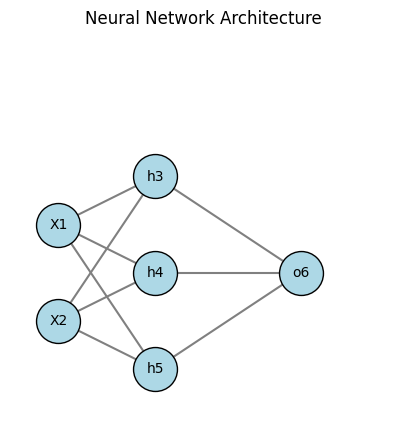

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define input features
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR-like classification
Y = np.array([[0], [1], [1], [0]])  # Expected output

# Define weights and biases
W1 = np.array([[0.5, -0.5], [-0.5, 0.5]])  # Weights for layer 1
b1 = np.array([[0.0, 0.0]])  # Bias for layer 1
W2 = np.array([[0.7, -0.7], [0.7, -0.7]])  # Weights for layer 2
b2 = np.array([[0.0, 0.0]])  # Bias for layer 2
W3 = np.array([[1.0], [-1.0]])  # Weights for output layer
b3 = np.array([[0.0]])  # Bias for output layer

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass
def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    output = sigmoid(z3)
    return output

# Compute predictions
y_pred = forward_pass(X)
print("Predicted Output:")
print(y_pred)

# Compute loss (Binary Crossentropy)
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-12  # Avoid log(0) error
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

loss = binary_cross_entropy(Y, y_pred)
print("Loss:", loss)

# Visualization of the Neural Network
def draw_neural_network():
    plt.figure(figsize=(5, 5))
    plt.xlim(-1.5, 2.5)
    plt.ylim(-1.5, 2.5)

    # Define positions
    positions = {
        "X1": (-1, 0.5), "X2": (-1, -0.5),
        "h3": (0, 1), "h4": (0, 0), "h5": (0, -1),
        "o6": (1.5, 0)
    }

    # Draw nodes
    for node, pos in positions.items():
        plt.scatter(*pos, s=1000, color='lightblue', edgecolors='black', zorder=3)
        plt.text(pos[0], pos[1], node, fontsize=10, ha='center', va='center', zorder=4)

    # Draw edges
    edges = [("X1", "h3"), ("X1", "h4"), ("X1", "h5"),
             ("X2", "h3"), ("X2", "h4"), ("X2", "h5"),
             ("h3", "o6"), ("h4", "o6"), ("h5", "o6")]

    for start, end in edges:
        pos1, pos2 = positions[start], positions[end]
        plt.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], 'gray', zorder=2)

    plt.title("Neural Network Architecture")
    plt.axis('off')
    plt.show()

# Draw the neural network
draw_neural_network()
